<a href="https://colab.research.google.com/github/varalakshmiarcot/Machine-Learning/blob/master/Predicting_Average_Price_Of_Avocados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Average Price Of Avocados

## Table of Content
1. [Problem Statement](#secyion1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Feature Engineering on the categorical Features : region and type](#section4)<br>
5. [Try with Decisiontree Regressor Model](#section4)<br>
6. [Try with RandomForestRegressor](#section5)<br>

## 1.Problem Statement
Predict the Avocado’s Average Price based on different features. 


## 2.Data Loading and Description
The Columns in Dataset are:
   - Date - The date of the observation
   - AveragePrice - the average price of a single                        avocado
   - type - conventional or organic
   - year - the year
   - Region - the city or region of the observation
   - Total Volume - Total number of avocados sold
   - 4046 - Total number of avocados with PLU 4046 sold
   - 4225 - Total number of avocados with PLU 4225 sold
   - 4770 - Total number of avocados with PLU 4770 sold

#### Importing Packages

In [0]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing the Dataset

In [0]:
df_avocado = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df_avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The variables in dataset are:
- Categorical: ‘region’,’type’
- Date: ‘Date’
- Numerical:‘Unamed: 0’,’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
- Target:‘AveragePrice’

## 3. Exploratory Data Analysis

The Feature "Unnamed:0" is just a representation of the indexes,lets remove it.

In [0]:
df_avocado.drop('Unnamed: 0',axis=1,inplace=True)

In [0]:
df_avocado.shape

(18249, 13)

In [0]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [0]:
df_avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Avocado Dataset dont have missing values

#### Extacting Month and Day values from Date Column

In [0]:
df_avocado['Date']=pd.to_datetime(df_avocado['Date'])
df_avocado['Month']=df_avocado['Date'].apply(lambda x:x.month)
df_avocado['Day']=df_avocado['Date'].apply(lambda x:x.day)

In [0]:
df_avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Distribution of Features

Plotting the Avocado's Average Price through the Date column

Text(0.5, 1.0, 'Average Price Of Avocado')

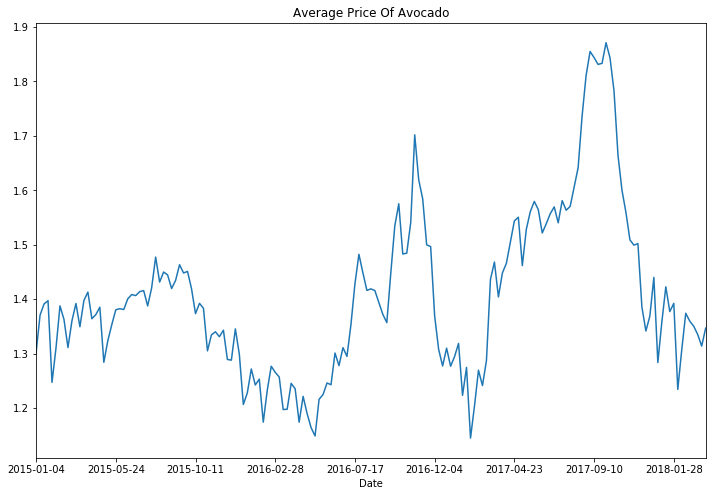

In [0]:
PurchaseDate = df_avocado.groupby('Date').mean()
plt.figure(figsize=(12,8))
PurchaseDate['AveragePrice'].plot()
plt.title('Average Price Of Avocado')

#### Correlation Of features using heatmap

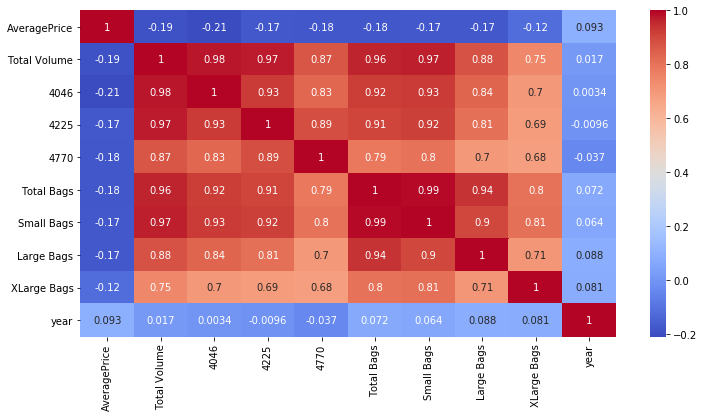

In [0]:
plt.figure(figsize=(12,6))
sns.heatmap(df_avocado.corr(),cmap='coolwarm',annot=True)

All the Features are not correlated with the Average Price, instead most of them are correlated with each other. 

### Feature Engineering on the categorical Features : region and type

In [0]:
df_avocado['region'].nunique()

54

In [0]:
df_avocado['type'].nunique()

2

 we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region, its complex to do so I decided to drop the entire column. I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [0]:
df_avocadosfinal=pd.get_dummies(df_avocado.drop(['region','Date'],axis=1),drop_first=True)

In [0]:
df_avocadosfinal.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0


Here Target variable 'AveragePrice is continuous, appliying Linear Regression model.Let's now begin to train out regression model! We will need to first split up our data into an X train that contains the features to train on, and a y trainwith the target variable

In [0]:
X=df_avocadosfinal.iloc[:,1:14]
y=df_avocadosfinal['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [0]:
print(X)

       Total Volume     4046       4225  ...  XLarge Bags  year  type_organic
0          64236.62  1036.74   54454.85  ...          0.0  2015             0
1          54876.98   674.28   44638.81  ...          0.0  2015             0
2         118220.22   794.70  109149.67  ...          0.0  2015             0
3          78992.15  1132.00   71976.41  ...          0.0  2015             0
4          51039.60   941.48   43838.39  ...          0.0  2015             0
...             ...      ...        ...  ...          ...   ...           ...
18244      17074.83  2046.96    1529.20  ...          0.0  2018             1
18245      13888.04  1191.70    3431.50  ...          0.0  2018             1
18246      13766.76  1191.92    2452.79  ...          0.0  2018             1
18247      16205.22  1527.63    2981.04  ...          0.0  2018             1
18248      17489.58  2894.77    2356.13  ...          0.0  2018             1

[18249 rows x 10 columns]


In [0]:
print(y)

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64


In [0]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (14599, 10)
y_train shape:  (14599,)

Test cases as below
X_test shape:  (3650, 10)
y_test shape:  (3650,)


In [0]:
X_train.to_csv("datasump_xtrain.csv") 
X_test.to_csv("datasump_xtest.csv") 
y_train.to_csv("datasump_ytrain.csv")
y_test.to_csv("datasump_ytest.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


#### Creating and Training the model using Linear Regressor

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

#### Model Evoluation

In [0]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.24097655032688603
MSE: 0.09760990350811949
RMSE: 0.3124258368127058


The RMSE is low so we can say that we do have a good model

#### Plotting the y_test vs the predictions

Text(0, 0.5, 'Predicted Y')

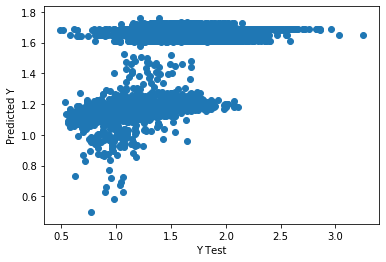

In [0]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

As we can see that we dont have a straight line so its not best model for this data

## Try with Decision Tree Regressor Model

In [0]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)

#### Plotting the y_test vs the predictions

Text(0, 0.5, 'Predicted Y')

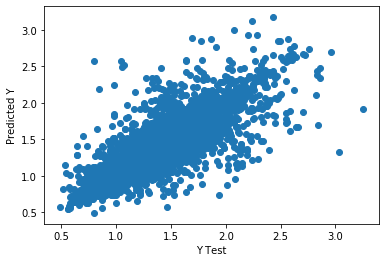

In [0]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Here we can see that a straigt line, in other words its better than the Linear regression model, and  lets check the RMSE

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1574849315068493
MSE: 0.06095819178082191
RMSE: 0.24689712793149682


Here RMSE is lower than the previous one we got with Linear Regression.

## Try with Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
randomReg = RandomForestRegressor()
randomReg.fit(X_train,y_train)
pred=randomReg.predict(X_test)

Checking the Metrics

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.12286871232876714
MSE: 0.03165048276712328
RMSE: 0.17790582555701565


Here RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

#### Plotting the y_test and y_predictions

Text(0, 0.5, 'Predicted Y')

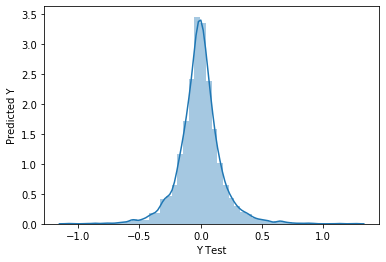

In [0]:
sns.distplot((y_test-pred),bins=50)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Here that residuals looked to be normally distributed and that's really a good sign which means that Randomforest model was a correct choice for the data.

## Y_test and predicted data using Randomforest Alogorithm

,Y Test,Pred
8604,0.82,1.0299
2608,0.97,1.0081
14581,1.44,1.3710
4254,0.97,0.9133
16588,1.45,1.4685


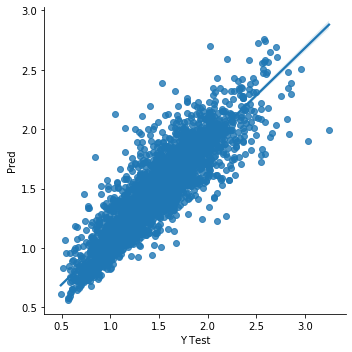

In [0]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()